In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_error, median_absolute_error, mean_squared_log_error, \
mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
%matplotlib inline

In [2]:
base = pd.read_csv('kc_house_data.csv')

In [14]:
base.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
clearData = lambda text : text.split('T')[0]

In [5]:
base['date'] = base['date'].apply(clearData)

In [10]:
toInt = lambda text : np.int64(text)

In [11]:
base['date'] = base['date'].apply(toInt)

In [13]:
base.drop('id', axis=1, inplace=True)

# Test Importance

In [17]:
preditors = base.copy()

In [18]:
target = preditors.price

In [19]:
preditors.drop('price', axis=1, inplace=True)

In [26]:
preditors['random'] = np.random.rand(len(target))

In [29]:
tree = DecisionTreeRegressor()
tree.fit(preditors, target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

<BarContainer object of 20 artists>

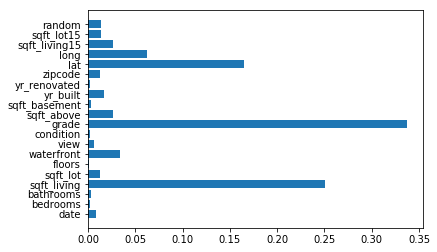

In [30]:
plt.barh(preditors.columns,tree.feature_importances_) 

In [33]:
tree.score(preditors, target)

1.0

In [34]:
preditors.drop(['random', 'sqft_lot15', 'zipcode', 'yr_built', 'yr_renovated', 'condition', 'view', 'floors',
                'bathrooms', 'bedrooms', 'date', 'sqft_basement'], axis=1, inplace=True)

In [39]:
tree = DecisionTreeRegressor()
tree.fit(preditors, target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

<BarContainer object of 8 artists>

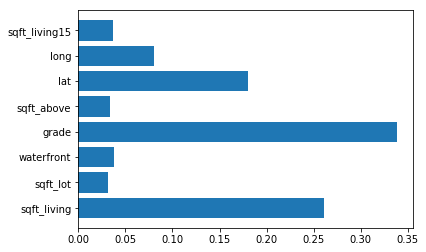

In [40]:
plt.barh(preditors.columns,tree.feature_importances_) 

In [41]:
preditors['magnitude'] = np.sqrt((preditors.long ** 2) + (preditors.lat ** 2))

In [42]:
preditors.drop(['long', 'lat'], axis=1, inplace=True)

<BarContainer object of 7 artists>

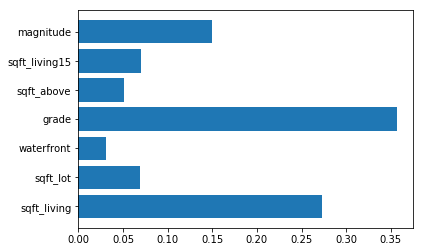

In [43]:
tree = DecisionTreeRegressor()
tree.fit(preditors, target)
plt.barh(preditors.columns,tree.feature_importances_) 

# Seleção de parâmetros

In [46]:
parameters = {'criterion':['mse', 'mae'], 'max_depth':list(range(2,7))}
parameters['max_depth'].append(None)
tree = DecisionTreeRegressor()
grid = GridSearchCV(estimator=tree, param_grid=parameters, cv=4, n_jobs=-1)
grid.fit(preditors, target)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 5, 6, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
print(pd.DataFrame(grid.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.013456      0.001498         0.001248    4.313305e-04   
1        0.017955      0.001411         0.001244    4.273721e-04   
2        0.024184      0.002272         0.001247    4.315016e-04   
3        0.028923      0.002993         0.001746    4.313295e-04   
4        0.032663      0.002579         0.001496    4.981758e-04   
5        0.078544      0.002158         0.002001    9.643435e-06   
6        2.431006      0.020460         0.000998    3.576279e-07   
7        2.995240      0.027624         0.001246    4.317770e-04   
8        3.277970      0.023680         0.001001    9.012727e-06   
9        3.350042      0.052958         0.001003    1.026637e-05   
10       3.567960      0.046429         0.001246    4.305773e-04   
11       3.911539      0.014225         0.002244    4.337091e-04   

   param_criterion param_max_depth                                   params  \
0              mse               2  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [48]:
print(grid.best_params_)

{'criterion': 'mse', 'max_depth': 6}


In [53]:
tree = DecisionTreeRegressor(max_depth=6)
cross_validate(estimator=tree, X=preditors, y=target, cv=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.02989817, 0.02692771, 0.0259304 , 0.02692771]),
 'score_time': array([0.00099802, 0.00099754, 0.00099778, 0.00099778]),
 'test_score': array([0.69705016, 0.68710261, 0.60325406, 0.64790611]),
 'train_score': array([0.73084367, 0.72951449, 0.7449094 , 0.73682154])}

In [58]:
Xt, Xts, Yt, Yts = train_test_split(preditors, target, test_size=0.2)

In [78]:
tree = DecisionTreeRegressor(max_depth=6)
tree.fit(Xt, Yt)
predict = tree.predict(Xts)
print(mean_absolute_error(Yts, predict) , '\b$')
print(median_absolute_error(Yts, predict), '\b$')
print(mean_squared_error(Yts, predict), '$ ^ 2')
print(mean_squared_log_error(Yts, predict), '$log')

135726.52194405242 $
93066.98780487804 $
52385832625.25092 $ ^ 2
0.10154596545625794 $log
